<br>

<b><font size=22>Predictive methods</font></b>
# (Homework - Midterm)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

# Linear algebra, optimization and linear regression
**The purpose of this session is to learn how to handle numpy and its features in Python.** 

The first part proposes some exercises to manipulate basic functions from numpy. Do not hesitate to visit the following
page: https://numpy.org/doc/.

The second part will focus on some monovariable optimization methods. The goal will be to implement three
well-known methods (golden-section search, parabolic interpolation and Newton’s method). Algorithms in
pseudo-code are provided.

Finally we will work on the Boston’s housing dataset: the goal is to predict the median value of houses’
prices in different suburbs of Boston given different features of the districts (criminality, industrialization,
etc. . . ). 

You will use numpy to implement your own version of the linear regression (we call that “coding from
scratch”). 

For the parameter estimation, you will use either the function minimize from the package scipy
or your own implementation of the gradient descent algorithm (the latter is recommended, even if minimize
is a very interesting function). 

Check the online help !

 Exercise: K-means from scratch

**In this exercise, you will code an algorithm from scratch to perform K-means clustering.**

## 1. Data generation process:

**First generate a “toy example”, a 2-dimensional dataset (only two features
x1 and x2) in order to test your implementation.** 

**For example, by setting K = 4, you could define a simulation model specific for each cluster, as follows:**

* Cluster 1: x1 ∼ N (1, σ) and x2 ∼ N (1, σ)
* Cluster 2: x1 ∼ N (1, σ) and x2 ∼ N (−1, σ)
* Cluster 3: x1 ∼ N (−1, σ) and x2 ∼ N (−1, σ)
* Cluster 4: x1 ∼ N (−1, σ) and x2 ∼ N (1, σ)

## 2. Effect of parameter σ on the resulting clusters

**According to the previous data simulation model, setting σ = 0.1, generate K = 4 clusters, each cluster
should contain 25 observations. Draw the corresponding scatterplot, using a different color for each
cluster. Draw the same scatterplot for different values of σ (σ = 0.2, 0.3, 0.4, 0.5, ...). Explain the effect
of parameter σ on the resulting clusters.**

For 2 question, I will combine these question into a bloc code.

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import warnings

To create a cluster with high dimension(in this case 2D array)from Normal distribution, we can use ``np.random.normal`` 
or ``np.random.distribution`` (may be better in this case)

In [241]:
#test function 2
def data_generation(obs, **params):
    distribution = params.get("Distribution", "normal") 
    mu = params.get("mean", 1)
    sigma = params.get("standard_deviation", 0.1)

    df = pd.DataFrame(columns= ["x1", "x2", "cluster"])
    np.random.seed(123)

    for nb in range(len(mu)):   #for each column in dataframe
        globals()["x" + str(nb + 1)] = np.array([]) #initalize 2 array x1 and x2
        for i, mean in enumerate(mu[nb]): #for each mean in a column
            #append new array to initial array x1 and x2
            globals()["cluster_" + str(nb + 1) + str(i + 1)] = getattr(np.random, distribution)(mean, sigma, obs) #cluster_01 = np.random.distribution(1, 5, obs)
            globals()["x" + str(nb + 1)] = np.concatenate((globals()["x" + str(nb + 1)], globals()["cluster_" + str(nb + 1) + str(i + 1)]), axis = None)
  
    df = pd.concat([df, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)   
    for i in range(0, obs * len(mu[0]), obs):
        df.loc[(df.index >= i) & (df.index < i + obs), 'cluster'] = i/obs + 1
    return  df

In [242]:
df = data_generation(25, mean = ([1, 1, -1, -1], [1, -1, -1, 1]))

In [272]:
df.head()

,x1,x2,cluster,1,2,3,4,closest_centroid
0,1.218679,0.966752,1.0,0.121004,3.924152,0.038274,0.001338,4
1,1.038619,0.797495,1.0,0.075501,3.206010,0.046149,0.080051,3
2,1.117583,1.074822,1.0,0.062269,4.302162,0.011897,0.020855,3
3,1.220593,0.862905,1.0,0.143743,3.530413,0.059204,0.018330,4
4,1.149139,0.926478,1.0,0.083733,3.727727,0.021914,0.013091,4


In [244]:
df.dtypes

x1         object
x2         object
cluster    object
dtype: object

In [245]:
df["x1"] = df["x1"].astype(float)
df["x2"] = df["x2"].astype(float)

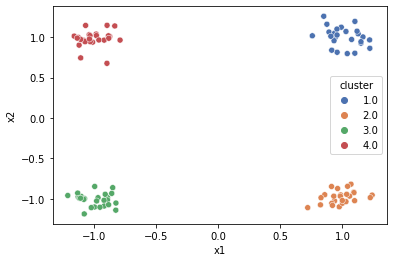

In [246]:
import seaborn as sns
sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'cluster' , palette="deep")
plt.show()

In [247]:
colors = {1:'red', 2:'green', 3:'blue', 4:'salmon'}
# plt.scatter(df.x1, df.x2, c= df['cluster'].map(colors) )

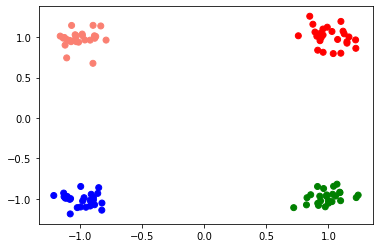

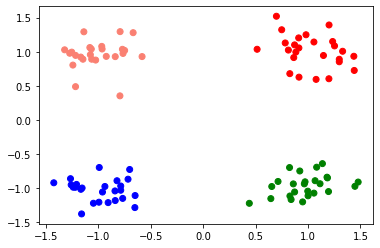

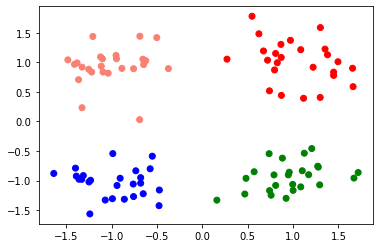

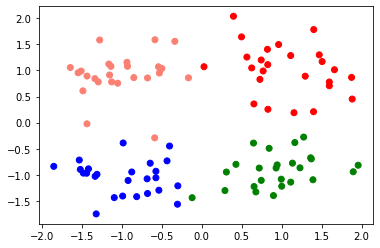

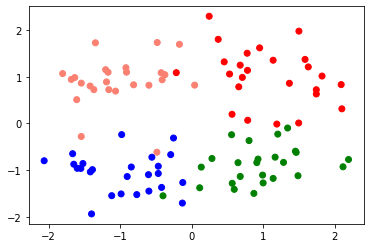

In [248]:
for i in range(1, 6):
    globals()["df" + str(i)]  = data_generation(25, mean = ([1, 1, -1, -1], [1, -1, -1, 1]), standard_deviation = i/10)
    plt.scatter(globals()["df" + str(i)].x1, globals()["df" + str(i)].x2, c= globals()["df" + str(i)].cluster.map(colors))
    plt.show()

## 3. K cluster centroids
**The training dataset should be a matrix X ∈ R n×2 (n = 25K observations and 2 features). Propose a way to initialize K-means, in other words: randomly pick K cluster centroids µ1, µ2, ..., µK.**

### Random pick K clusters centroids out of sample 

In [249]:
#np.random.seed(123)
df_centroids = pd.DataFrame(columns= ["x1", "x2"])
cov = [[0.1, 0], [0, 0.1]]
mean = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]
x1, x2 = np.random.multivariate_normal(mean, cov, 4).T
df_centroids = pd.concat([df_centroids, pd.DataFrame({"x1": x1, "x2": x2, })], ignore_index= True)  

### Random pick K clusters centroids in our sample 

In [250]:
#df_centroids = pd.DataFrame(columns= ["x1", "x2"])
np.random.seed(123)
centroids = []
for k in range(4):
    centroid = df[["x1", "x2"]].apply(lambda x: float(x.sample()))
    centroids.append(centroid)
df_centroids = pd.concat(centroids , axis = 1).T  

In [251]:
def intialization_centroids(K, data):
    np.random.seed(123)
    centroids = []
    for k in range(K):
        centroid = data[["x1", "x2"]].apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    df_centroids = pd.concat(centroids , axis = 1).T 
    return df_centroids 

In [252]:
df_centroids = intialization_centroids(4, df)
df_centroids

## 4. Assign to closest cluster centroid

**Implement the cluster assignment step: for each observation x
(i), assign this observations to its closest
cluster centroid, in other words compute for all i ∈ {1, ..., n}:**


In [254]:
def distance(xA, yA, xB, yB): 
    distance = ((xA - xB) ** 2 + (yA - yB) ** 2) 
    return distance

In [255]:
##test 
# for i in range(4):
#    globals()["df"][i + 1]  = distance(df.iloc[:, 0], df.iloc[:, 1],df_centroids.iloc[:, 0][i], df_centroids.iloc[:, 1][i])
# df["closest_centroid"] = df.iloc[:, 3:7].idxmin(axis = 1)  

In [256]:
#def cluster_centroid()
def cluster_centroid(data, data_centroids, K):
    df = data
    d = f'{df=}'.split('=')[0]
    for i in range(K):        
        globals()[d][i + 1] = distance(data.iloc[:, 0], data.iloc[:, 1],data_centroids.iloc[:, 0][i], data_centroids.iloc[:, 1][i])
    data["closest_centroid"] = data.iloc[:, 3:7].idxmin(axis = 1) 

In [257]:
cluster_centroid(df, df_centroids, 4)

In [258]:
print(df.to_string())

          x1        x2 cluster         1         2         3         4  closest_centroid
0   0.891437  1.064205     1.0  0.065236  0.010018  4.483069  4.296136                 2
1   1.099735  0.802211     1.0  0.027065  0.073387  3.479431  3.349355                 1
2   1.028298  1.071226     1.0  0.021049  0.001872  4.527480  4.361581                 2
3   0.849371  1.259830     1.0  0.164062  0.063902  5.352751  5.141332                 2
4   0.942140  0.997537     1.0  0.035113  0.005107  4.206256  4.033427                 2
5   1.165144  1.003414     1.0  0.002999  0.032672  4.296057  4.158008                 1
6   0.757332  1.017955     1.0  0.139210  0.055416  4.311360  4.107403                 2
7   0.957109  0.813802     1.0  0.051440  0.056965  3.487773  3.334054                 1
8   1.126594  1.042615     1.0  0.006099  0.018570  4.440361  4.292636                 1
9   0.913326  0.839459     1.0  0.061123  0.050340  3.581704  3.418714                 2
10  0.932111  0.95723

## 5. Compute the average (mean) of these observations

**Implement the update cluster centroid step: for each cluster k, consider the set of obervations assigned
to cluster k, and compute the average (mean) of these observations, in other words, compute for all
k ∈ {1, ..., K}:**

In [259]:
# df_centroids_new = df.groupby(["closest_centroid"])[["x1","x2"]].mean().reset_index()
# df_centroids_new


In [260]:
def new_centroids(data):
    df_centroids_new = data.groupby(["closest_centroid"]).mean().reset_index().iloc[:, 1:3]
    return df_centroids_new
    
new_centroids(df)

,x1,x2
0,1.119637,0.927973
1,-0.308103,1.010144
2,1.028835,-0.976051
3,-0.686854,-1.009256


In [261]:
df_centroids_new = new_centroids(df)

## 6. Draw again the corresponding scatterplot with the current cluster centroids 
**Draw again the corresponding scatterplot, using a different color for each point in a cluster, and add
K points representing the current cluster centroids (you should use a different symbol to distinguish
between points and cluster centroids).**

### methode 1

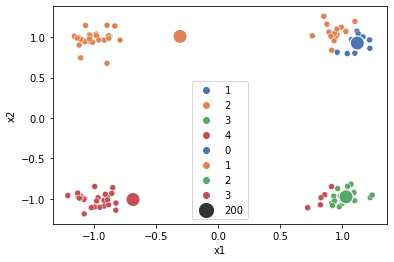

In [262]:
df = df.sort_values('closest_centroid', ascending = True, ignore_index= True)
sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
sns.scatterplot(data = df_centroids_new, x = "x1", y = "x2", hue= df_centroids_new.index,size = 200, sizes= (200,200) , palette="deep")
plt.show()


### Method 2

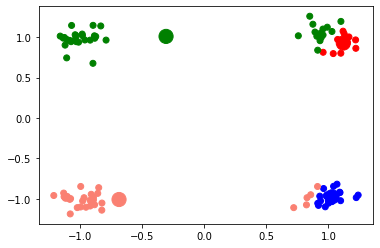

In [263]:

colors = {1:'red', 2:'green', 3:'blue', 4:'salmon'}
plt.scatter(df.x1, df.x2, c= df['closest_centroid'].map(colors) )
plt.scatter(df_centroids_new.x1, df_centroids_new.x2, marker = 'o', s = 200, c = (df_centroids_new.index + 1).map(colors) )
plt.show()

## 7. Repeat steps 4 to 6
**Use a loop in order to repeat steps 4 to 6. The number of iterations should be large enough for the
algorithm to have time to converge. Note that a parameter ϵ (a small value) can be introduced here to
stop the algorithm automatically, we can force the algorithm to stop**

In [264]:
iteration = 1
max_iteration = 100
#colors = {'centroid1':'red', 'centroid2':'green', 'centroid3':'blue', 'centroid4':'salmon'}
colors = {1:'red', 2:'green', 3:'blue', 4:'salmon'}
colors_centroids = {0:'red', 1:'green', 2:'blue', 3:'salmon'}
#df_centroids = intialization_centroids(4, df)
df_old_centroids = pd.DataFrame()

By using plt.scatter, Im not prefer because I need to set up difference color if K is changed, therefore I prefer using sns plot 

In [265]:
# while (iteration < max_iteration):
#     df_old_centroids = df_centroids
#     cluster_centroid(df, df_old_centroids)
#     df_centroids = new_centroids(df)
#     plt.scatter(df.x1, df.x2, c= df['closest_centroid'].map(colors) )
#     plt.scatter(df_centroids.x1, df_centroids.x2, marker = 'o', s = 200, c= df_centroids.index.map(colors_centroids) )
#     plt.show()
#     if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
#         break
#     iteration += 1

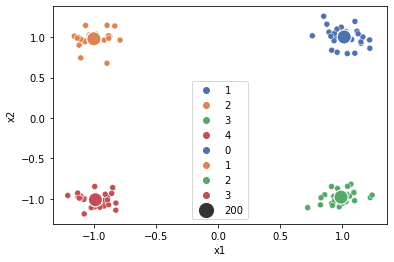

In [268]:
while (iteration < max_iteration):
    df_old_centroids = df_centroids
    if(df_old_centroids.shape[0] < 4):
        warnings.warn("Cluster devanished! Reducing the number of K, or reinitialization Kmeans")
    K = df_old_centroids.shape[0] 
    cluster_centroid(df, df_old_centroids, K)
    df_centroids = new_centroids(df)
    sns.scatterplot(data = df, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
    sns.scatterplot(data = df_centroids, x = "x1", y = "x2", hue = df_centroids.index, size = 200, sizes= (200,200) , palette="deep")
    plt.show()
    if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
        break
    iteration += 1

## 8. Kmeans function
**Implement the whole algorithm in a same Python (or R) funtion, named Kmeans, that takes the matrix
X as input, and returns as outputs: the clusters assigned to the observations c (1), c(2), ..., c(n) and the cluster centroids µ1, µ2,  .., µK. Ideally, the function should plot the final scatterplot, with a different color for each cluster, and the corresponding cluster centroids.**

However, sometimes, when we run Kmeans clustering, we can face with the problem, the size of new centroids after calculating by mean of distance for each cluster can be smaller than K. In other hand, it means that we can see the case that one or more than one cluster can be empty. In this case, we have some solutions: 
* simply ignore this cluster (set k=k-1 for next iteration) ?
* repeat the k-means run from a new initialization ?
* choose to place a random point for new centroid that has been missing ?

This problem we can see from the question 9, when we want to repeat Kmeans several times 

When a centroid is vanishes (the number of centroid point is smaller than K). In this case, we  I choose the simplest method, ignore and reduce the size of K 

In [232]:
def Kmeans(data, K):
    iteration = 1
    max_iteration = 100
    df_old_centroids = pd.DataFrame()

    #set up centroids
    #df_centroids = intialization_centroids(4, df)
    centroids = []
    for k in range(K):
        centroid = data[["x1", "x2"]].apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    df_centroids = pd.concat(centroids , axis = 1).T 

    while (iteration < max_iteration):
        df_old_centroids = df_centroids

        # cluster_centroid(data, df_old_centroids)
        data.drop(data.iloc[:, data.shape[1] - K - 1 : ], inplace=True, axis=1)
        # In the case of empty cluster, I reduce number of K
        if(df_old_centroids.shape[0] < K):
            warnings.warn("Cluster devanished! Reduce the number of K, or reinitialization Kmeans")
            K = df_old_centroids.shape[0] 
        # Calculate the distance between old centroids and observations
        for i in range(K):        
            data.insert(data.shape[1], str(i + 1), distance(data.iloc[:, 0], data.iloc[:, 1],df_old_centroids.iloc[:, 0][i], df_old_centroids.iloc[:, 1][i]), True)
        data["closest_centroid"] = data.iloc[:, data.shape[1] - K : data.shape[1]].idxmin(axis = 1) 

        #df_centroids = new_centroids(df)
        #def new_centroids(data):
        df_centroids = data.groupby(["closest_centroid"]).mean().reset_index().iloc[:, 1: (df_old_centroids.shape[1] + 1)]

        #plot resultat 
        data = data.sort_values('closest_centroid', ascending = True, ignore_index= True)
        clear_output(wait= True)
        plt.title(f'Iteration {iteration}')
        sns.scatterplot(data = data, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
        sns.scatterplot(data = df_centroids, x = "x1", y = "x2", hue = df_centroids.index ,size = 200, sizes= (200,200) , palette="deep")
        plt.show()
        if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
            break
        iteration += 1


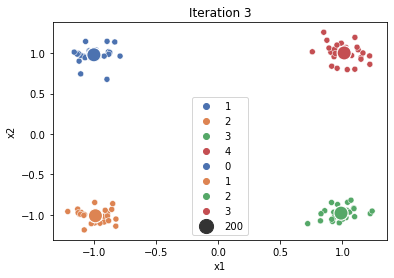

In [191]:
Kmeans(df, 4)

## 9. Implement “repeated” K-means to reduce the risk of finding local optima

**Modify your function and implement “repeated” K-means, in order to reduce the risk of finding local
optima. The final function must be applied to the simulated data (see question 1), with different values
of σ. Propose a way to compute the quality of the obtained partition: is there a way to compute a
misclassification error rate in this case ?**

Based on Eucliedien matric, we know that kmeans algorithm can be described as a simple optimization problem, which is minimizing the within cluster sum of squared errors (SSE). When we run N time kmeans clustering independently, we will have N initialization centroids randomly, the best model will be with the smallest SSE - KMeans inertia

$SSE =  \sum_{i = 1} ^ {N}\sum_{k = 1} ^ {K} w^{(i,k)} || x^{i} - \mu^{k}|| $

After repeat the Steps 4 to 6, our centroids don’t change, therefore It is not necessaire to re-calculate the square of distance between new - mean centroid and our observations

In [269]:
def repeated_kmeans(data, N, K):
    global error_list
    error_list = []
    list_df = []
    list_df_centroids = []
    for i in range(N):
        Kmeans(data, K)
        # In this step, I just take the sum all cells between centroid 1 to K
        error = data.iloc[:, data.shape[1] - K - 1: data.shape[1] - 1].values.sum()  #to get SSE all cells from 4 centroids and all observations  
        error_list.append(error)
        list_df.append(data)
        list_df_centroids.append(df_centroids)

    print("After repeat Kmeans {} times, the minimum SSE is {}".format(N, min(error_list)))
    


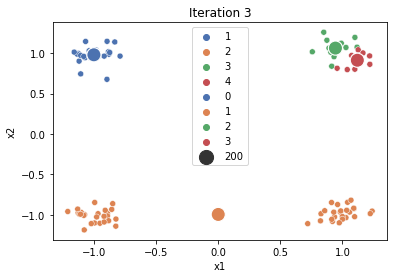

After repeat Kmeans 10 times, the minimum SSE is 1521.0439196467767


In [270]:
repeated_kmeans(df, 10, 4)

## 10. Generalize your function for a matrix 
Generalize your function for a matrix X ∈ R n×p, where p > 2.

In [ ]:
def Kmeans(data, K):
    iteration = 1
    max_iteration = 100
    df_old_centroids = pd.DataFrame()

    #set up centroids
    #df_centroids = intialization_centroids(4, df)
    centroids = []
    for k in range(K):
        centroid = data[["x1", "x2"]].apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    df_centroids = pd.concat(centroids , axis = 1).T 

    while (iteration < max_iteration):
        df_old_centroids = df_centroids

        # cluster_centroid(data, df_old_centroids)
        data.drop(data.iloc[:, data.shape[1] - K - 1 : ], inplace=True, axis=1)
        # In the case of empty cluster, I reduce number of K
        if(df_old_centroids.shape[0] < K):
            warnings.warn("Cluster devanished! Reduce the number of K, or reinitialization Kmeans")
            K = df_old_centroids.shape[0] 
        # Calculate the distance between old centroids and observations
        for i in range(K):        
            data.insert(data.shape[1], str(i + 1), distance(data.iloc[:, 0], data.iloc[:, 1],df_old_centroids.iloc[:, 0][i], df_old_centroids.iloc[:, 1][i]), True)
        data["closest_centroid"] = data.iloc[:, data.shape[1] - K : data.shape[1]].idxmin(axis = 1) 

        #df_centroids = new_centroids(df)
        #def new_centroids(data):
        df_centroids = data.groupby(["closest_centroid"]).mean().reset_index().iloc[:, 1: (df_old_centroids.shape[1] + 1)]

        #plot resultat 
        data = data.sort_values('closest_centroid', ascending = True, ignore_index= True)
        clear_output(wait= True)
        plt.title(f'Iteration {iteration}')
        sns.scatterplot(data = data, x = "x1", y = "x2", hue= 'closest_centroid' , palette="deep")
        sns.scatterplot(data = df_centroids, x = "x1", y = "x2", hue = df_centroids.index ,size = 200, sizes= (200,200) , palette="deep")
        plt.show()
        if np.all(abs(distance(df_centroids.iloc[:, 0], df_centroids.iloc[:, 1], df_old_centroids.iloc[:, 0], df_old_centroids.iloc[:, 1])) < 0.01):
            break
        iteration += 1


## 11. Test your function on a real dataset.
Many datasets can be easily loaded on Python with the library
scikit-learn: https://scikit-learn.org/stable/datasets/index.html. For R users, have a look on the 2 package datasets. Here again, propose a way to compute the quality of the obtained partition: is there a way to compute a misclassification error rate in this case ?

## References:
* How much can k-means be improved by using better initialization
and repeats? (Pattern Recognition (page 95 - 112)): Pasi Fränti, Sami Sieranoja: School of Computing, University of Eastern Finland

    https://reader.elsevier.com/reader/sd/pii/S0031320319301608?token=B4BC182832C3BDE2E3FDD483AC3245D60293C77B74FDD2EB7C46B6B6A67762AB240FD7A8081EB635454869D4FFC2E2D6&originRegion=eu-west-1&originCreation=20221117125552

* Python machine learning - Sebastian Raschka & Vahid Mirjalili

    https://www.amazon.fr/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1789955750

* A Modified k-means Algorithm to Avoid Empty Clusters (International Journal of Recent Trends in Engineering, Vol 1, No. 1, May 2009): Malay K. Pakhira Kalyani Government Engineering College, Kalyani, West Bengal, INDIA  

    https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=099b1b974feace8c4ed94088fc11b8bd250ed25f
   
   